In [1]:
########### Bring in tools to use in rest of notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
import plotly.express as px
import json
import requests
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
############|

* * * 
* * *
<h3 align="center">Components of figures for</h3>

<h1 align="center">THE REAL MCCOY: GREAT UNCONFORMITY SOURCE-TO-SINK ON THE 
RIFTED PASSIVE MARGIN OF WESTERN LAURENTIA
 </h1>

    
<h2 align="center">Anttila et al., 2024</h2>

* * * 


See README.md for additional file storage/data location info. 

For inquiries, please contact E. Anttila at eanttila@ucsb.edu.

* * *
* * *

## LA-ICPMS detrital zircon plots
* * *
* * *
Import zircon LA-ICP-MS concordia ages and concordance

In [2]:
TCU1=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='TCU1')
TCU3=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='TCU3')
TCU4=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='TCU4')
TCU5=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='TCU5')
TCU6=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='TCU6')
TCU7=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='TCU7')
Yelland=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Yelland')
Bassett=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Bassett')
Egan=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Egan')
Willard=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Willard')
Strawberry=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Strawberry')
Shingle=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Shingle')
Prospect=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Prospect')
Osceola=pd.read_excel('Input/Geochronology/Compiled_LAICPMS_DZ.xlsx',sheet_name='Osceola')

* * *
Define list of samples to be plotted.

In [3]:
DZSample_List=[TCU1,TCU3,TCU4,TCU5,TCU6,TCU7,Yelland,Bassett,Egan,Willard,Strawberry,Shingle,Osceola, Prospect]
DZSample_List_Names=['Trout Creek Unit 1','Trout Creek Unit 3','Trout Creek Unit 4','Trout Creek Unit 5',
                    'Trout Creek Unit 6',
                    'Trout Creek Unit 7',
                    'Yelland Fm',
                    'Bassett Creek Fm',
                    'Egan Fm', 
                    'Willard Creek Fm',
                    'Strawberry Creek Fm',
                    'Shingle Creek Fm',
                    'Osceola', 
                    'Prospect Mountain Fm']

* * *
Define plot colors

In [4]:
DZcmap = plt.get_cmap('viridis')
DZSample_Colors=['cornflowerblue','darkviolet','purple','violet','sandybrown','orange','gold','navy','olive','plum','lightcoral','tan','purple','gray']
#'purple', 'tan', 'lightcoral', 'plum', 'olive', 'teal', 'darkkhaki', 'cornflowerblue', 'navy', 'gold', 'goldenrod', 'darkorange', 'sandybrown', 'salmon', 

* * *
Set up discordia filters based on discordia length (Vermeesch, 2018).

Discordia filter used for detrital spectra here are -10<x<15, which equates to an acceptable discordia length range of -2.62 to 5.16.



In [5]:
#Set parameters of Discordia filter, translating to Discordia Length metric of Vermeesch (2018)
Dn10=-2.62 #-10%
D10=3.67 #10%
D15=5.16 #15%
D20=6.7 #20%
D30=10.2 #30%

* * *
Set binwidths for histogram and bandwith for KDE. Binwidth/bandwith is in millions of years.



In [6]:
binwidth=10

* * *
Calculate KDE's and histograms for detrital zircon data, using concordia ages (following Vermeesch, 2021) for all analyses that fall within acceptable discordia envelope. Function name: DetritalKDEplot()

In [7]:
#KDE FUNCTION

def DetritalKDEplot(): #define function to trim discordant and reverse discordant ages from detrital data, and generate KDE
    Discard_ndiscord=Detrital.loc[Detrital['discordance'] > Dn10] #remove all ages that are more negatively-discordant than chosen filter.
    Discard_discord=Discard_ndiscord.loc[Detrital['discordance'] < D15] #remove all remaining ages that are more discordant than chosen filter.
    Detritalages=pd.Series.to_numpy(Discard_discord['concordia_age']).reshape(len(Discard_discord['concordia_age']),1) #define and reshape detrital data for KDE function
    xplot = np.linspace(0, 4000, 40000)[:, np.newaxis] #create range of x values to populate with KDE model output
    kde = KernelDensity(kernel='gaussian', bandwidth=binwidth).fit(Detritalages) #define KDE
    log_dens = kde.score_samples(xplot) #populate x values with model output
    
    fig,ax=plt.subplots(figsize=(12, 1),facecolor='none')
    plt.axvspan(1480,1420,color='gray',alpha=.15)#eastern granite rhyolite province
    plt.axvspan(1330,1380,color='gray',alpha=.15)#southern granite rhyolite province
    plt.axvspan(1430,1300,color='navy',alpha=.15)#picuris orogeny
    plt.axvspan(1800,1600,color='navy',alpha=.15)#yavapai/mazatzal orogeny
    plt.axvspan(1820,1880,color='gray',alpha=.15) #penokean
    plt.axvspan(1700,1780,color='gray',alpha=.15) #Yavapai
    plt.axvspan(1680,1620,color='gray',alpha=.15) #Mazatzal
    plt.axvspan(3100,2550,color='gray',alpha=.15) #Wyoming
    plt.axvspan(1190,990,color='darkgreen',alpha=.10) 
    plt.axvline(685.5,color='firebrick',alpha=.3)
    plt.axvline(695.5, color='orange',alpha=.3)
    plt.axvline(1700, color='k',alpha=.3)
    plt.axvline(1400, color='k',alpha=.3)
    ax.hist(Detritalages,bins=np.arange(500,3000, binwidth),alpha=.4,color=detrital_colors)
    ax.set_ylabel("Number of grains",color=detrital_colors)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.xaxis.grid()
    ax.yaxis.set_tick_params(direction='in')
    ax.set_xticklabels([])
    ax2=ax.twinx()
    ax2.fill(xplot,np.exp(log_dens), c='k',alpha=.1,zorder=2)
    numsamples=str((len(Detritalages)))
    ax2.plot(xplot,np.exp(log_dens), c='k',linewidth=.5,alpha=1,zorder=2, label='n='+numsamples+'') #label with number of samples used to create KDE.
    ax2.set_ylabel(detrital_data_name,color='k',size=10, rotation=270,labelpad=20)
    ax2.yaxis.set_tick_params(labelright=False,direction='in')
    ax2.yaxis.set_tick_params(direction='in')
    ax2.set_yticks([])
    plt.xlim(500,3000)
    plt.legend(fontsize=10,loc='upper right',facecolor='white', framealpha=0)

    
    plt.savefig('Output/Detrital_Spectra/'+detrital_data_name+'_KDE_Plot.pdf')
    

## DZ age spectra for Fig. 9
* * *

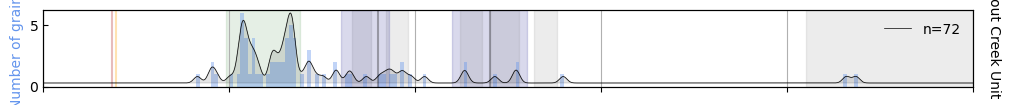

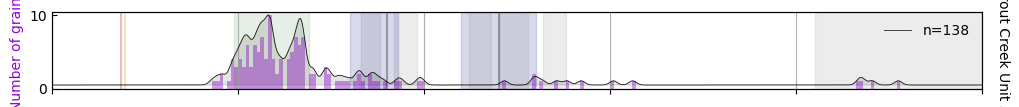

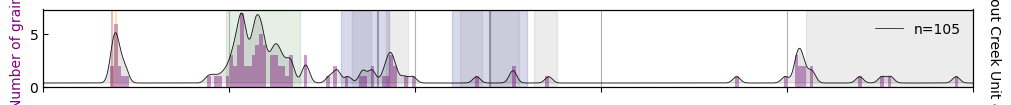

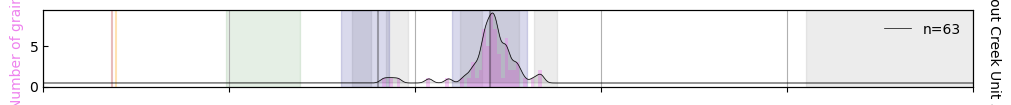

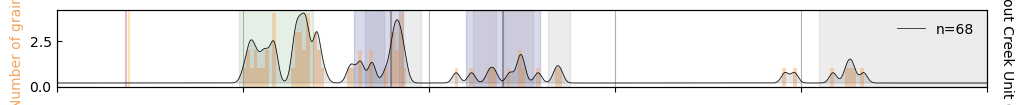

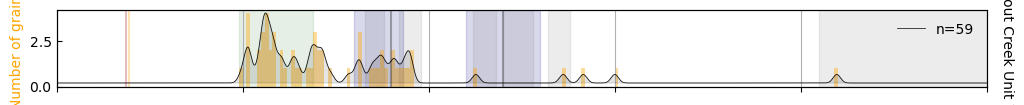

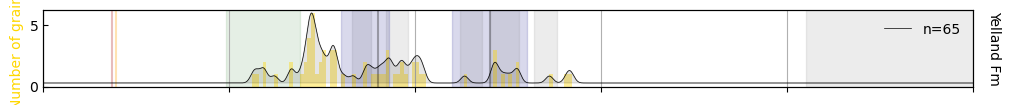

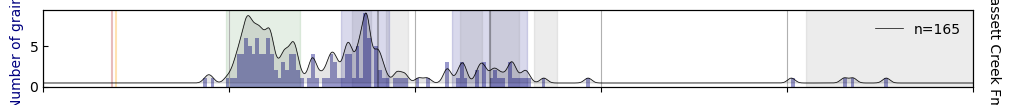

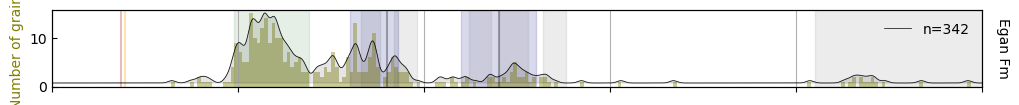

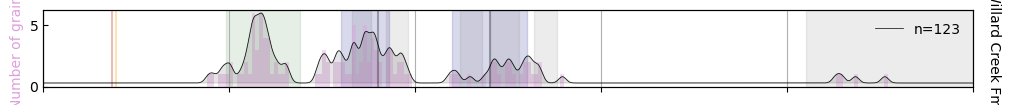

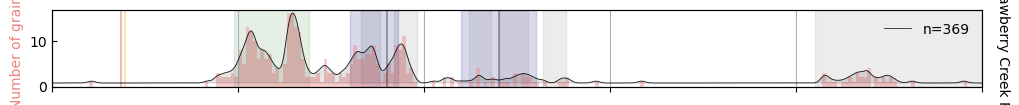

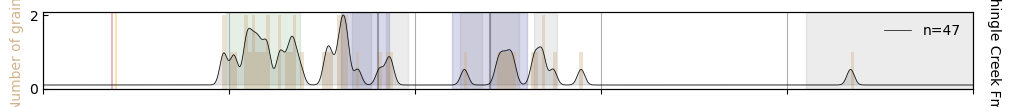

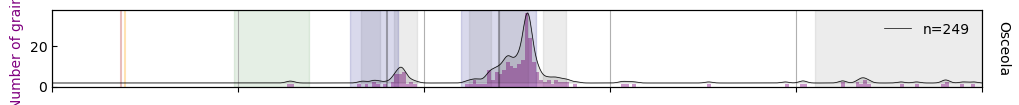

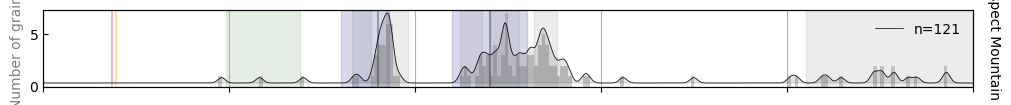

In [8]:
for jj in range(0,len(DZSample_List)): 
    Detrital = DZSample_List[jj]
    detrital_data_name = DZSample_List_Names[jj]
    detrital_colors=DZSample_Colors[jj]
    DetritalKDEplot()

## Foreset orientation rose diagrams for Fig. 7
* * * 

In [9]:
########### Bring in tools to use in rest of notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
import plotly.express as px
import json
import requests
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
############

In [10]:
import mplstereonet

In [11]:
foresets = pd.read_csv('Input/Foresets/Foresets_Taft_adj.csv') #change to Foresets_Salvi_adj, and Foresets_Upper_adj to plot other horizons
strikes=foresets['corr_dir'].tolist()

In [12]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

In [13]:
number_of_strikes[0] += number_of_strikes[-1]

In [14]:
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

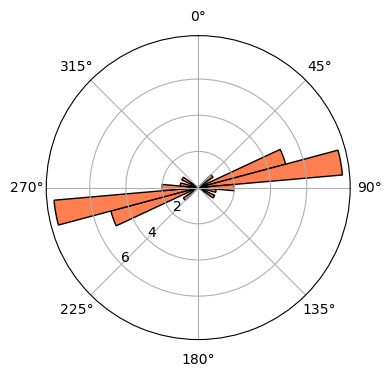

In [15]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='coral', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
#ax.set_thetagrids(np.arange(0, 360, 45), labels=np.arange(0, 360, 45))
ax.set_rgrids(np.arange(2, two_halves.max(),2), angle=225)
#ax.set_title('Paleoflow direction', y=1.10, fontsize=15)

fig.tight_layout()
plt.savefig('Output/Taft_rose.pdf')

## Global d13C compilation for Fig. 6

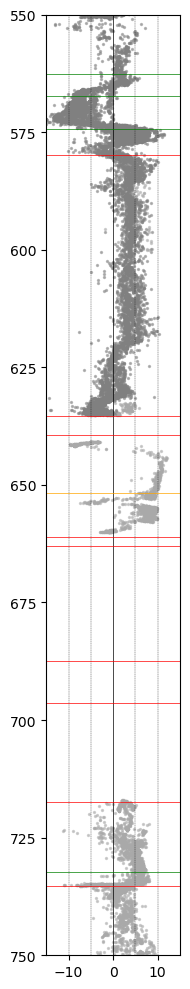

In [9]:
Ed2022=pd.read_excel('Input/Chemostrat/Global_Composites/Yang_et_al_2021_Comp_simple.xlsx')
C=Ed2022['δ13Ccarb (‰)']
h=Ed2022['Model age (Ma)']

ParkCryo=pd.read_csv('Input/Chemostrat/Global_Composites/Park_et_al_SturtCryo.csv')

C1=ParkCryo['d13C']
h1=ParkCryo['age']

ECRanked=plt.figure(figsize=(2,10))#set figure dimensions


plt.scatter(C1,h1,s=2,color='darkgrey',alpha=.5,zorder=2)
plt.scatter(C,h,s=2,color='gray',alpha=.5,zorder=2)

def carb_axes():
    plt.axvline(0, color='k', linewidth=.5)
    plt.axvline(5, color='k', ls='--',linewidth=.25)
    plt.axvline(-5, color='k',ls='--',linewidth=.25)
    plt.axvline(10, color='k', ls='--',linewidth=.25)
    plt.axvline(-10, color='k',ls='--',linewidth=.25)
    
carb_axes()

def ages():
    plt.axhline(562.7, color='g',linewidth=.5)#Rooney et al., 2020a, ReOs,±3.8
    plt.axhline(567.3, color='g',linewidth=.5)#Rooney et al., 2020a, ReOs, ±3.0
    plt.axhline(574.3, color='g',linewidth=.5)#Rooney et al., 2020a, ReOs,±4.7
    plt.axhline(579.88, color='r',linewidth=.5)#Pu et al., 2016, TIMS,±.81
    plt.axhline(635.26, color='r',linewidth=.5) #Condon et al., 2005, TIMS,±1.07
    plt.axhline(639.3, color='r',linewidth=.5) #Prave et al., 2016, TIMS,±0.3
    plt.axhline(651.7, color='orange',linewidth=.5) #Nelson et al., 2020, TIMS MDA,±0.6
    plt.axhline(661.0, color='r',linewidth=.5) #Rooney et al., 2020b, TIMS, ±0.2
    plt.axhline(663.03, color='r',linewidth=.5) #Cox et al., 2018,±0.1
    plt.axhline(687.4, color='r',linewidth=.5) #Keeley et al., 2012,±1.3
    plt.axhline(696.43, color='r',linewidth=.5) #Isakson et al., 2022,±0.21
    
    plt.axhline(717.4, color='r',linewidth=.5)#Macdonald et al., 2010, TIMS, ±0.1
    plt.axhline(732.2, color='g',linewidth=.5)#Rooney et al., 2014, ReOs,±3.9
    plt.axhline(735.25, color='r',linewidth=.5)#Maclennan et al., 2018, TIMS,±.25
    

ages()

plt.gca().set_xlim([-15,15])
plt.gca().set_ylim([550,750])
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('Output/Global_Carb_Comp.pdf')

## Plotting sedrate and Bayesian subsidence curves in matplotlib for Fig. 8
Note: first, run the following notebook to generate model tectonic subsidence and sedrate curves: /Bayesian_Subsidence/McCoy_Subsidence_Bayesian.ipynb

In [11]:
McCoySedrate=plt.figure(figsize=(10,4)) #define figure dimensions 

McCoy_Age_Height='Bayesian_Subsidence/Output/Fullstrat_Adj/'
#import modeled sedimentation parameters from Chron.jl model
McCoy_DHDT=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt.csv') #mean modeled sedrate
McCoy_DHDT16=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_16.csv') 
McCoy_DHDT20=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_20.csv')
McCoy_DHDT25=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_25.csv')
McCoy_DHDT30=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_30.csv')
McCoy_DHDT35=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_35.csv')
McCoy_DHDT40=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_40.csv')
McCoy_DHDT45=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_45.csv')
McCoy_DHDT55=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_55.csv')
McCoy_DHDT60=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_60.csv')
McCoy_DHDT65=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_65.csv')
McCoy_DHDT70=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_70.csv')
McCoy_DHDT75=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_75.csv')
McCoy_DHDT80=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_80.csv')
McCoy_DHDT84=pd.read_csv(McCoy_Age_Height+'McCoy_dhdt_84.csv') 
McCoy_Bins=pd.read_csv(McCoy_Age_Height+'McCoy_bincenters.csv') #sampled bins for sedrate model

[plt.axhline(y=i, linestyle='--',color='purple',lw=.2,alpha=.5) for i in [0,.04,.08]]

plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT16.values.squeeze(),McCoy_DHDT84.values.squeeze(), alpha=.1, color='purple')#fill 95ci envelope
plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT20.values.squeeze(),McCoy_DHDT80.values.squeeze(), alpha=.1, color='purple')
plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT25.values.squeeze(),McCoy_DHDT75.values.squeeze(), alpha=.1, color='purple')
plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT30.values.squeeze(),McCoy_DHDT70.values.squeeze(), alpha=.1, color='purple')
plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT35.values.squeeze(),McCoy_DHDT65.values.squeeze(), alpha=.1, color='purple')
plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT40.values.squeeze(),McCoy_DHDT60.values.squeeze(), alpha=.1, color='purple')
plt.fill_between(McCoy_Bins.values.squeeze(),McCoy_DHDT45.values.squeeze(),McCoy_DHDT55.values.squeeze(), alpha=.1, color='purple')
plt.plot(McCoy_Bins,McCoy_DHDT,color='purple',alpha=.75,lw=.5)
plt.axhline(13.3,xmin=1-(400-660)/(400-750),xmax=1-(717-400)/(750-400),color='darkviolet',linestyle="--",lw=.7)
plt.axhline(20,xmin=1-(400-640)/(400-750),xmax=1-(635-400)/(750-400),color='darkviolet',linestyle="--",lw=.7)
plt.axhline(125,xmin=1-(400-660)/(400-750),xmax=1-(640-400)/(750-400),color='darkviolet',linestyle="--",lw=.7)

plt.gca().invert_xaxis()

plt.ylabel('Sedimentation rate (m/Myr)', fontsize=10)
plt.xlabel('Age (Ma)', fontsize=10)

plt.xlim(750,400)
ax=plt.gca()
ax.axis('off')
plt.savefig('Output/Bayesian_sedrate_curve.pdf', transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Bayesian_Subsidence/Output/Fullstrat_Adj/McCoy_dhdt.csv'

<Figure size 1000x400 with 0 Axes>

In [12]:
McCoy_Subsidence='Bayesian_Subsidence/Output/Fullstrat_Adj/'
#import modeled sedimentation parameters from Chron.jl model
McCoy_age=pd.read_csv(McCoy_Subsidence+'Age_at_height_McCoy.csv') #mean modeled sedrate
McCoy_tecsub_mean=pd.read_csv(McCoy_Subsidence+'Mc_mu_highres.csv') #mean modeled sedrate
McCoy_tecsub=pd.read_csv(McCoy_Subsidence+'Mc_highres.csv') #mean modeled sedrate

McCoySubsidence_Bayesian=plt.figure(figsize=(10,4)) #define figure dimensions 


#plot Sturtian
#plt.axvspan(660,717,alpha=.15,color='navy')
    
    #plot Marinoan
#plt.axvspan(635,640,alpha=.15,color='navy')
    
    #plot Gaskiers
#plt.axvspan(579.24,580.90,alpha=.15,color='navy')
    
    #plot Avalonia glacial
#plt.axvline(565,alpha=.15,color='navy')
    
    #plot Shuram
#plt.axvspan(565.24,572,alpha=.15,color='gray')
    
    #plot Sauk
#plt.axvspan(470,510,alpha=.15, color='teal')

#plt.axvline(637,color='r',linestyle="--")
[plt.axhline(y=i, linestyle='--',color='navy',lw=.2,alpha=.5) for i in [0,1000,2000,3000]]

plt.plot(McCoy_age,McCoy_tecsub,color='navy',linewidth=.1,alpha=.05)
plt.plot(McCoy_age,McCoy_tecsub_mean,color='navy',lw=.5,alpha=.75)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(750,400)
ax=plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
#ax.axis('off')

plt.savefig('Output/Bayesian_subsidence_curve.pdf', transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Bayesian_Subsidence/Output/Fullstrat_Adj/Age_at_height_McCoy.csv'

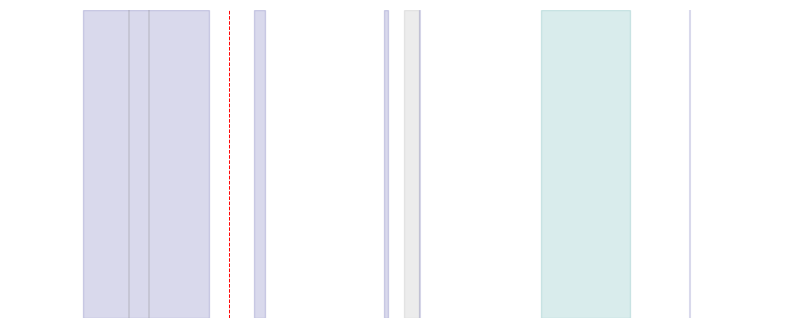

In [13]:
McCoySubsidence_colorblocks=plt.figure(figsize=(10,4)) #define figure dimensions 

#plot Sturtian
plt.axvspan(660,717,alpha=.15,color='navy',lw=None)
    
    #plot Marinoan
plt.axvspan(635,640,alpha=.15,color='navy',lw=None)
    
    #plot Gaskiers
plt.axvspan(579.24,580.90,alpha=.15,color='navy',lw=None)
    
    #plot Avalonia glacial
plt.axvline(565,alpha=.15,color='navy')
    
    #plot Shuram
plt.axvspan(565.24,572,alpha=.15,color='gray',lw=None)
    
    #plot Sauk
plt.axvspan(470,510,alpha=.15, color='teal',lw=None)

    #plot Hirnantian, after Ling et al, 2019
plt.axvline(443,alpha=.15, color='navy')

#plot syn-sturt idaho rift volcanics
plt.axvline(687.4, color='gray',linewidth=.3) #Keeley et al., 2012,±1.3
plt.axvline(696.43, color='gray',linewidth=.3) #Isakson et al., 2022,±0.21
    


plt.axvline(651,color='r',linestyle="--",lw=.7)
    

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(750,400)
ax=plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.axis('off')


plt.savefig('Output/Full_Colorblocks_nocurve.pdf', transparent=True)